In [291]:
#!/usr/bin/env python

#Safir Mikhail 18.02.2021 

import os
import json
import random
import time
import numpy
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [292]:
class Settings:
    devices = 10 # Number of devices in the simulation
    signal_per_device_gain = 150 
    signal_per_device_zone = 100
    end_x = 800
    end_y = 800
    
settings = Settings()

In [293]:
class Draw:

    
    def draw(self, points):
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        
        
        fig = plt.gcf()
        ax = fig.gca()
        
        for i in range(0, len(points[0])):
            ax.add_artist(plt.Circle((points[0][i], points[1][i]), settings.signal_per_device_zone, color='r', fill=False))

        plt.plot(points[0], points[1], 'o')
        plt.plot(0, 0, 'o')
        plt.plot(1000, 1000, 'o')
        
        plt.title("Routing")
        plt.grid(False)
        plt.show();

        print(points)

In [294]:
class Generator:
    
    
    def walk(self, points):
        start_points_x = []
        start_points_y = []
        for i in range(0, len(points[0])):
            now_x = points[0][i]
            now_y = points[1][i]
            x, y = random.randint(-3, 3), random.randint(-3, 3)
            now_x += x
            now_y += y
            start_points_x.append(now_x)
            start_points_y.append(now_y)
        return [start_points_x, start_points_y]
            
    
    def start(self):
        start_points_x = []
        start_points_y = []
        for i in range(0, settings.devices):
            x, y = random.randint(100, settings.end_x),  random.randint(100, settings.end_y)
            start_points_x.append(x)
            start_points_y.append(y)
        return [start_points_x, start_points_y]
        pass

In [295]:
class Router:
    
    generator = Generator()
    draw = Draw()
    points = []
    
    def build(self):
        plt.ion()
        points = self.generator.start()
        self.draw.draw(points)
        plt.pause(1.5)
        while True:
            points = self.generator.walk(points)
            self.draw.draw(points)
            plt.pause(0.5)
        pass
    
    def start(self):
        self.build()
        pass

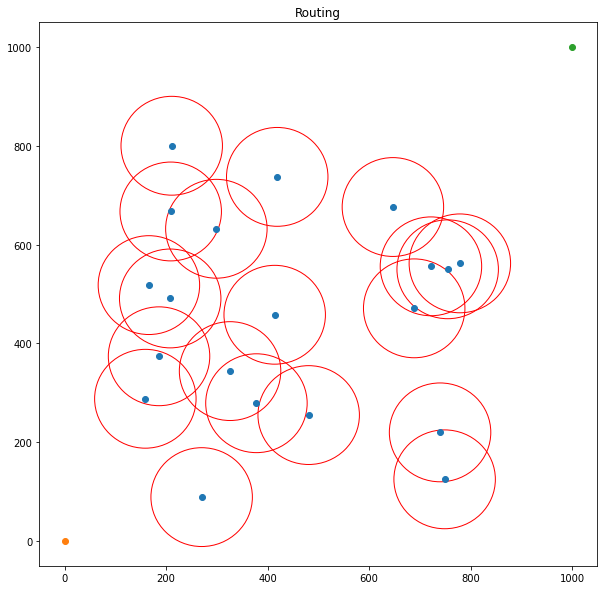

In [ ]:
router = Router() # call public class
settings.devices = 20

router.start()